In [67]:
# IT17100076 Notebook created.
# Importing Python Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("darkgrid")
plt.style.use("dark_background")



In [68]:
# Loading data

dataframe = pd.read_csv("D:\\SLIIT\\4th Year\\1st Semester\\ML\\Assignments\\Assignment - 01\\IT17100076\\it17100076_heart_disease_dataset.csv")

In [69]:
# All data of first 5 rows

dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
# Data Analysis

display(dataframe.info(), dataframe.describe(), dataframe.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(303, 14)

In [71]:
# checking for null values

dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

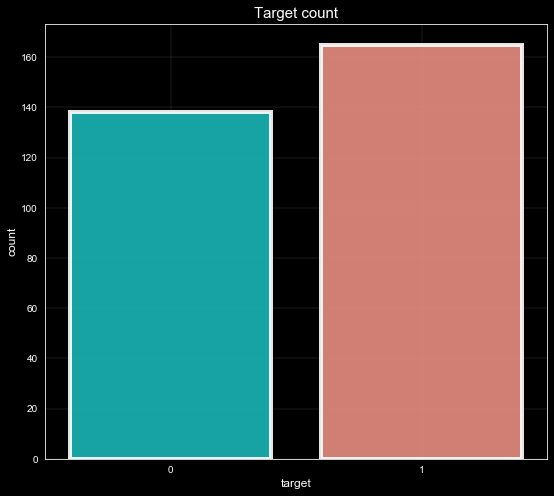

Percentage of negative Heart Disease: 45.54%
Percentage of  positive Heart Disease: 54.46%


1    165
0    138
Name: target, dtype: int64

In [72]:
# Getting target count

colors = ['darkturquoise', 'salmon']
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=(9,8)

axis = sns.countplot(x='target', data=dataframe, palette=colors, alpha=0.9, edgecolor=('white'), linewidth=4)
axis.set_ylabel('count', fontsize=12)
axis.set_xlabel('target', fontsize=12)
axis.grid(b=True, which='major', color='grey', linewidth=0.2)
plt.title('Target count', fontsize=15)
plt.show()

target_0 = len(dataframe[dataframe.target == 0])
target_1 = len(dataframe[dataframe.target == 1])

print("Percentage of negative Heart Disease: {:.2f}%".format((target_0 / (len(dataframe.target))*100)))
print("Percentage of  positive Heart Disease: {:.2f}%".format((target_1 / (len(dataframe.target))*100)))
dataframe.target.value_counts()

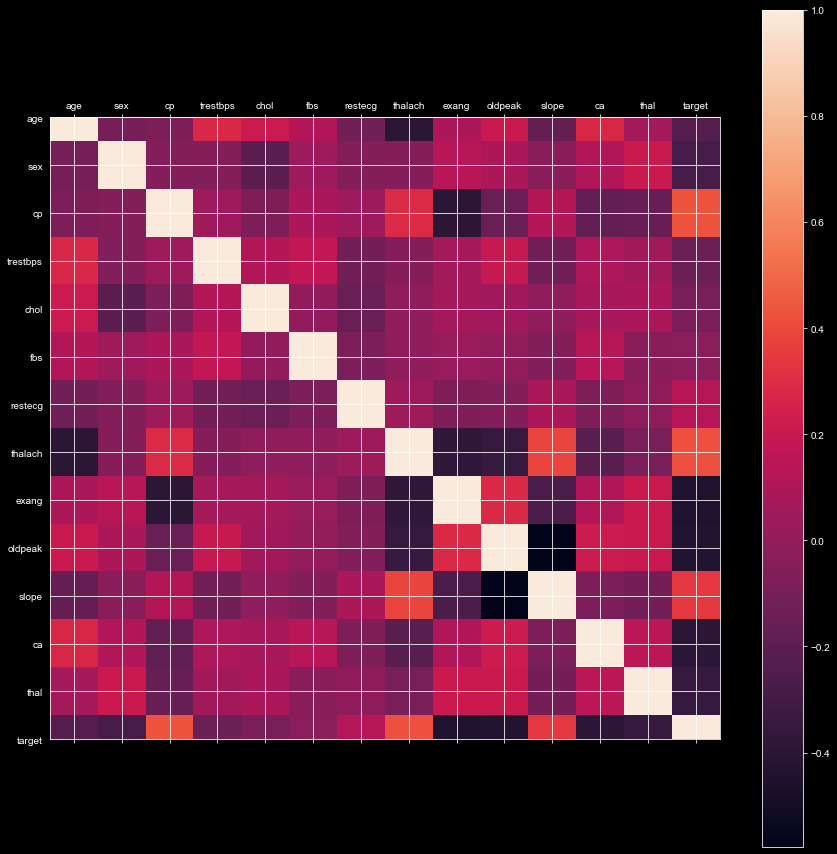

In [73]:
# Creating correlation metrix

plt.rcParams['figure.figsize'] = 15, 15
plt.style.use('dark_background')
plt.matshow(dataframe.corr()) 
plt.yticks(np.arange(dataframe.shape[1]), dataframe.columns) 
plt.xticks(np.arange(dataframe.shape[1]), dataframe.columns) 
plt.colorbar()

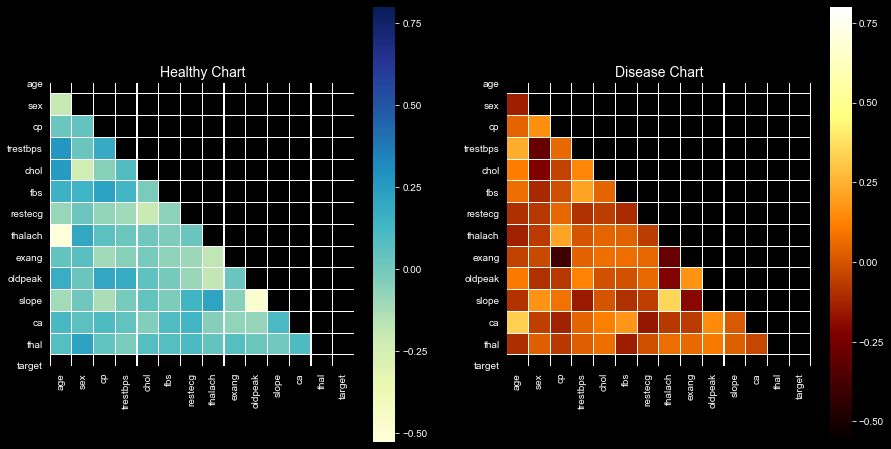

In [74]:
# Correlation matrix

plt.style.use('dark_background')
f, (axis1, axis2) = plt.subplots(1,2,figsize =(15, 8))
corr = dataframe.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmapkws = dict(linewidths=0.1) 

sns.heatmap((dataframe[dataframe['target'] ==1]).corr(), vmax = .8, square=True, ax = axis1, cmap = 'YlGnBu', mask=mask, **heatmapkws);
sns.heatmap((dataframe[dataframe['target'] ==0]).corr(), vmax = .8, square=True, ax = axis2, cmap = 'afmhot', mask=mask,**heatmapkws);

axis1.set_title('Healthy Chart', fontsize=14)
axis2.set_title('Disease Chart', fontsize=14)

plt.show()

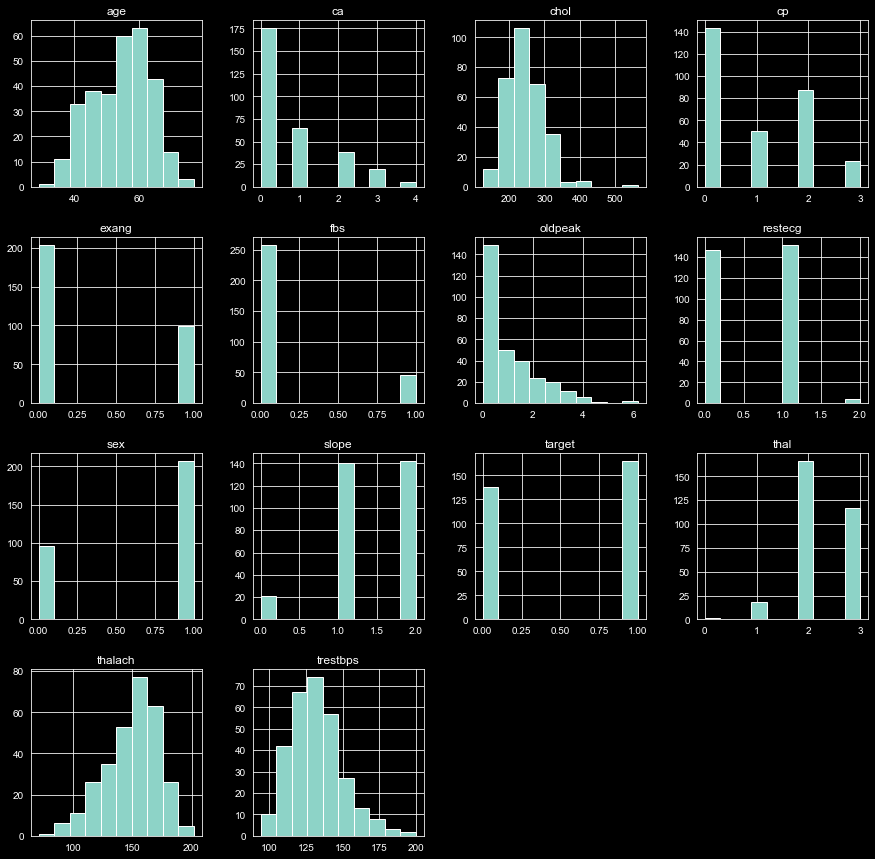

In [75]:
dataframe.hist() 
plt.style.use('dark_background')

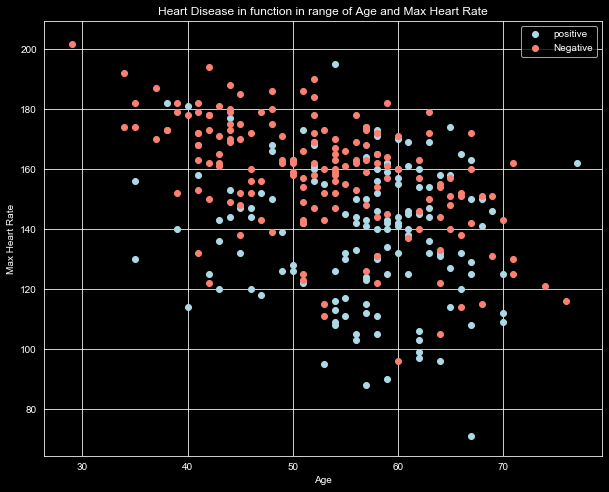

In [76]:
# Create another figure to expose max heart rate for age
plt.figure(figsize=(10, 8))

# Scatter with negative and postivie examples

plt.scatter(dataframe.age[dataframe.target==0],
            dataframe.thalach[dataframe.target==0],
            c="lightblue")

plt.scatter(dataframe.age[dataframe.target==1],
            dataframe.thalach[dataframe.target==1],
            c="salmon")




plt.title("Heart Disease in function in range of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["positive", "Negative"]);

In [77]:
# Filtering values

categorical_values = []
continous_values = []
for column in dataframe.columns:
    if len(dataframe[column].unique()) <= 10:
        categorical_values.append(column)
    else:
        continous_values.append(column)

In [78]:
# Getting categorical values from the dataset

categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [79]:
# Creating dummy columns for categorical values

categorical_values.remove('target')
dataset = pd.get_dummies(dataframe, columns = categorical_values)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [80]:
# Scalling provied columns
from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = ssc.fit_transform(dataset[columns_to_scale])

In [81]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [82]:
# Applying machine learning algorithm
# Data processing modeling and metrics

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


def print_score(clf, X_trainingdataset, y_trainingdataset, X_testingdataset, y_testingdataset, train=True):
    if train:
        pred = clf.predict(X_trainingdataset)
        print("Trained Result:\n********************************************")
        print(f"Accuracy Score: {accuracy_score(y_trainingdataset, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report for trained dataset:", end='')
        print(f"\tPrecision Score: {precision_score(y_trainingdataset, pred) * 100:.2f}%")
        print(f"\t\t\t\t\t\tRecall Score: {recall_score(y_trainingdataset, pred) * 100:.2f}%")
        print(f"\t\t\t\t\t\tF1 score: {f1_score(y_trainingdataset, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_trainingdataset, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_testingdataset)
        print("\n\n\nTest Result:\n*******************************************")        
        print(f"Accuracy Score: {accuracy_score(y_testingdataset, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report for test dataset:", end=' ')
        print(f"\tPrecision Score: {precision_score(y_testingdataset, pred) * 100:.2f}%")
        print(f"\t\t\t\t\t\tRecall Score: {recall_score(y_testingdataset, pred) * 100:.2f}%")
        print(f"\t\t\t\t\t\tF1 score: {f1_score(y_testingdataset, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_testingdataset, pred)}\n")

In [83]:
#Split dataset into 2 separte datasets
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_trainingdataset, X_testingdataset, y_trainingdataset, y_testingdataset = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
# Apply Random Forest Classifier Algorithm

from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
random_forest.fit(X_trainingdataset, y_trainingdataset)


print_score(random_forest, X_trainingdataset, y_trainingdataset, X_testingdataset, y_testingdataset, train=True)
print_score(random_forest, X_trainingdataset, y_trainingdataset, X_testingdataset, y_testingdataset, train=False)


Trained Result:
********************************************
Accuracy Score: 100.00%
_______________________________________________
Classification Report for trained dataset:	Precision Score: 100.00%
						Recall Score: 100.00%
						F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]




Test Result:
*******************************************
Accuracy Score: 82.42%
_______________________________________________
Classification Report for test dataset: 	Precision Score: 84.00%
						Recall Score: 84.00%
						F1 score: 84.00%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



In [85]:
# Finalize the training and testing accuracy in Random Forest

test_score = accuracy_score(y_testingdataset, random_forest.predict(X_testingdataset)) * 100
train_score = accuracy_score(y_trainingdataset, random_forest.predict(X_trainingdataset)) * 100

results_dataframe = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_dataframe

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest Classifier,100.0,82.417582


In [86]:
feature_importance = pd.DataFrame({'feature': list(X_trainingdataset.columns),
                   'importance': random_forest.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display importance of feature 
feature_importance.head()


,feature,importance
21,ca_0,0.099782
3,thalach,0.087201
4,oldpeak,0.087055
28,thal_2,0.073844
7,cp_0,0.067762
